# Visualize samples from the rwth-boston104 dataset


* You can download the dataset from http://www-i6.informatik.rwth-aachen.de/aslr/database-rwth-boston-104.php

* Extract the dataset to a chosen folder; then point the `basepath` variable to that folder
* You can visualize the whole dataset
* You can also run the `boston-104 split train-test` notebook to split the dataset into training and test sets


In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os
import boston104

In [8]:
basepath='/media/data/datasets/sign/rwth-boston-104'
basepath='/home/facundo/datasets/rwth-boston-104'
basepath='/data/datasets/rwth-boston-104'

# can also use 'train.xml' and 'test.xml' if you ran the split script
xml_filename='boston104.handpositions.rybach-forster-dreuw-2009-09-25.full.xml'

videos=os.path.join(basepath,'videoBank/camera0')
video_positions_filepath=os.path.join(basepath,'handpositions/',xml_filename)
images_path=os.path.join(basepath,'png-segments')

videos=boston104.parse_videos(video_positions_filepath)
print("Read %d videos" % len(videos))

frames=boston104.parse_videos_to_images(video_positions_filepath,images_path,ignore_images_with_outofbounds_positions=True)

print("Read %d frames" % len(frames))

Read 201 videos
Read 15746 frames


15746
{'left_hand': array([236, 198]), 'head': array([ 68, 171]), 'right_hand': array([236, 163])}


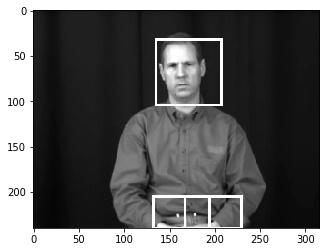

In [10]:

import skimage.io as io
import skimage
import matplotlib.pyplot as plt
import numpy as np
import utils

frame=1050
print(len(frames))

def read_boston104_image(images_path,frame):
    image=io.imread(frame.path)

    image=(skimage.color.rgb2grey(image)*255).astype(np.uint8)
    # remove the borders with text
    w=(0,240,10,326)
    image=image[w[0]:w[1],w[2]:w[3]]
    return image


image=read_boston104_image(images_path,frames[frame])
utils.draw_positions(image,frames[frame].positions)
print(frames[frame].positions)
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
print("Sample video frame metadata:\n")
print(frames[0])

Sample video frame metadata:

VideoFrame(video=98, frame=0, positions={'left_hand': array([181, 149]), 'head': array([ 62, 161]), 'right_hand': array([175, 170])}, path='/data/datasets/rwth-boston-104/png-segments/098/frame000000_cam0.png')
